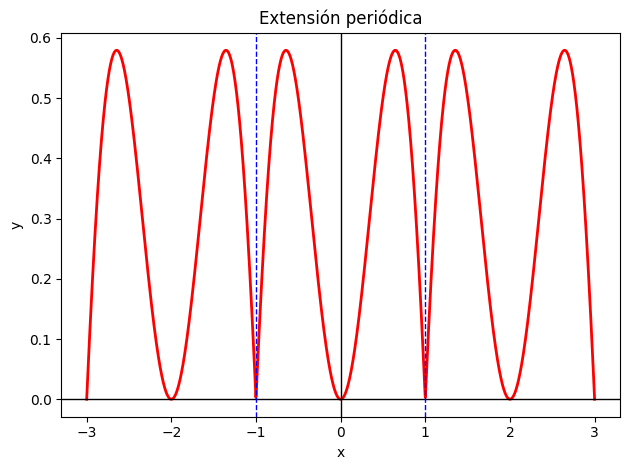

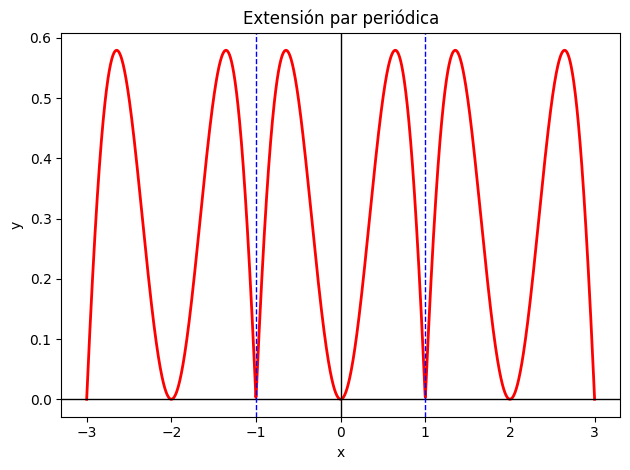

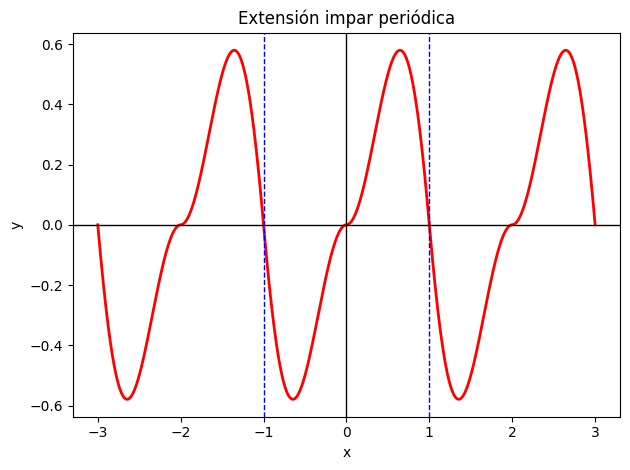

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def periodic_extension(f, a, b):
    T = b - a
    if T <= 0:
        raise ValueError("Require b > a for [a,b].")
    def F(x):
        x = np.asarray(x)
        t = a + np.mod(x - a, T)
        return f(t)
    return F

def even_extension_periodic(f, a, b):
    L = 0.5 * (b - a); m = 0.5 * (a + b)
    if L <= 0:
        raise ValueError("Require b > a for [a,b].")
    def Fe(x):
        x = np.asarray(x)
        u = ((x - m + L) % (2*L)) - L  # en [-L, L)
        t = m + np.abs(u)
        return f(t)
    return Fe

def odd_extension_periodic(f, a, b):
    L = 0.5 * (b - a); m = 0.5 * (a + b)
    if L <= 0:
        raise ValueError("Require b > a for [a,b].")
    def Fo(x):
        x = np.asarray(x)
        u = ((x - m + L) % (2*L)) - L  # en [-L, L)
        t = m + np.abs(u)
        return np.sign(u) * f(t)
    return Fo

# --- Helper para trazar con ejes coordenados ---
def plot_with_axes(x, y,a,b,title):
    plt.figure()
    plt.plot(x, y,color="red",linewidth=2)
    ax = plt.gca()
    ax.axhline(0,color="black", linewidth=1)  # eje x
    ax.axvline(0, color="black",linewidth=1)  # eje y
    ax.axvline(a, color="blue",linewidth=1,linestyle="--")
    ax.axvline(b, color="blue",linewidth=1,linestyle="--")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

# Insertar funcion.
f = lambda t: t*np.sin(np.pi*t)  # tu función en [a,b]
a, b = -1,1
x = np.linspace(2*a-b, 2*b-a, 2000)

Fper = periodic_extension(f, a, b)
Fe   = even_extension_periodic(f, a, b)
Fo   = odd_extension_periodic(f, a, b)

plot_with_axes(x, Fper(x),a,b, "Extensión periódica")
plot_with_axes(x, Fe(x),  a,b, "Extensión par periódica")
plot_with_axes(x, Fo(x),  a,b, "Extensión impar periódica")
